<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
cd ../

/Users/merad/Desktop/wildwood


In [2]:
#from wildwood.dataset import loaders_small_classification
import seaborn as sns
import matplotlib.pyplot as plt@
import numpy as np
import pandas as pd
from time import time
import pickle

%config Completer.use_jedi = False
%matplotlib inline

In [3]:
#with open("experiments/ntrees_experiment_2021-05-05-11:10:09.pickle", 'rb') as f:
with open("experiments/ntrees_experiment_2022-11-30-19:08:38.pickle", 'rb') as f:
    dictionary = pickle.load(f)

df = dictionary['results']

In [4]:
set(df.dataset.values)

{'adult', 'bank', 'car', 'default-cb'}

In [5]:
#df = (df.groupby(['dataset', 'classifier', 'classifier_title', 'n_trees']).mean()).reset_index([0,1, 2, 3])

In [6]:
df.repeat.unique()
seed_list = [42, 43, 44, 46, 47, 49, 50, 52, 53, 55]
dff = df[df.repeat.isin(list(range(3)))]#[x - 42 for x in seed_list])]#


In [7]:
from matplotlib.ticker import FormatStrFormatter
#sns.set_context("paper")
#sns.set(font_scale=1.6)
#sns.set_style(style="ticks")

def plot_comparison_n_trees(df, metric="roc_auc", filename=None, legend=True):
    #df["dataset"].unique()
    g = sns.FacetGrid(
        df, col="dataset", col_wrap=4, aspect=1, height=4, sharex=True, sharey=False
    )
    g.map(
        sns.lineplot,
        "x_pos",
        metric,
        "classifier",
        lw=4,
        marker="o",
        markersize=10,
        #palette=classifier_colors,
    ).set(xlabel="", ylabel="")#,yscale="log")

    axes = g.axes.flatten()

    for i, dataset in enumerate(df["dataset"].unique()):
        #plt.xticks([0, 1, 2, 5, 10, 20, 50, 100, 200])
        axes[i].xaxis.set_ticks(list(range(len([0, 1, 2, 5, 10, 20, 50, 100, 200]))))
        axes[i].set_xticklabels([0,1, 2, 5, 10, 20, 50, 100, 200], fontsize=14)
        left,right = axes[i].get_xlim()
        axes[i].set_xlim(0.6, right)
        axes[i].set_title(dataset, fontsize=20)
        axes[i].set_xlabel("#Trees", fontsize=18, labelpad=0.0)
        axes[i].tick_params(axis='y', which="major", labelsize=14)
        axes[i].tick_params(axis='y', which="minor", labelsize=14)
        #plt.yticks(fontsize=14)
        axes[i].yaxis.set_major_formatter(FormatStrFormatter('%.2g'))
        axes[i].yaxis.set_minor_formatter(FormatStrFormatter('%.2g'))
        
    if legend:
        plt.legend(
            ["RandomForest", "WildWood", "ExtraTrees"],
            bbox_to_anchor=(0.0, 0.45, 1.0, 0.0),
            loc="upper right",
            ncol=1,
            borderaxespad=0.0,
            fontsize=18,
        )

    #plt.xticks(fontsize=14)
    #plt.yticks(fontsize=18)

    plt.tight_layout()

    if filename is not None:
        plt.savefig(filename)
        #logging.info("Saved figure in " + filename)
    else:
        plt.show()


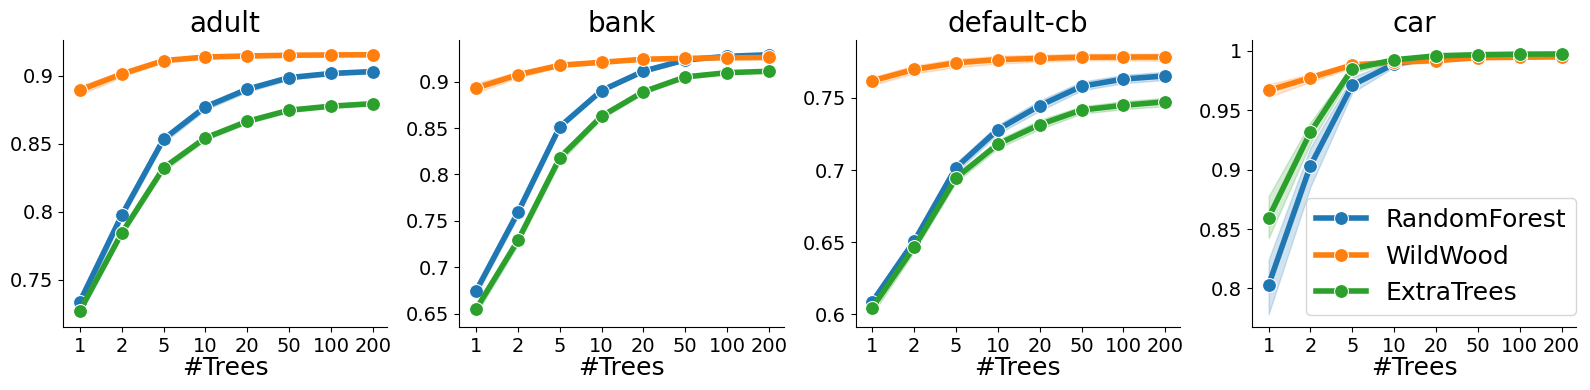

In [8]:
plot_comparison_n_trees(df, metric="roc_auc")#, filename="fig_n_trees"+str(time())+".pdf")

In [ ]:
plot_comparison_n_trees(dff, metric="roc_auc")#, filename="fig_n_trees"+str(time())+".pdf")

In [ ]:
plot_comparison_n_trees(df, metric="roc_auc", filename="fig_n_trees"+str(time())+".pdf")